## Implementing of the Decision Tree Classifier for Binary Classification Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from PIL import Image

In [2]:
dataset=make_classification(n_samples=1000,n_features=4,n_classes=2)

In [3]:
X=dataset[0]
y=dataset[1]

In [4]:
X.shape

(1000, 4)

Text(0.5, 1.0, 'Classified All Data')

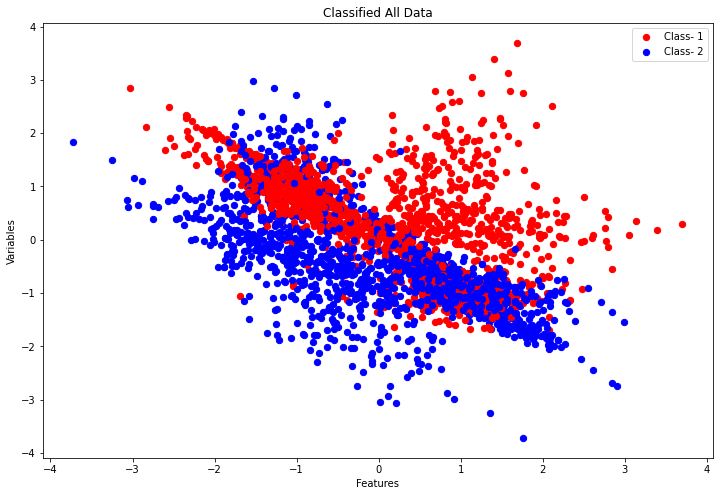

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 40, c = 'red', label = 'Class- 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 40, c = 'blue', label = 'Class- 2')

plt.scatter(X[y == 0, 1], X[y == 0, 2], s = 40, c = 'red')
plt.scatter(X[y == 1, 1], X[y == 1, 2], s = 40, c = 'blue')

plt.scatter(X[y == 0, 2], X[y == 0, 3], s = 40, c = 'red')
plt.scatter(X[y == 1, 2], X[y == 1, 3], s = 40, c = 'blue')
plt.legend()
plt.xlabel('Features')
plt.ylabel('Variables')
plt.title('Classified All Data')

Text(0.5, 1.0, 'Unclassified All Data')

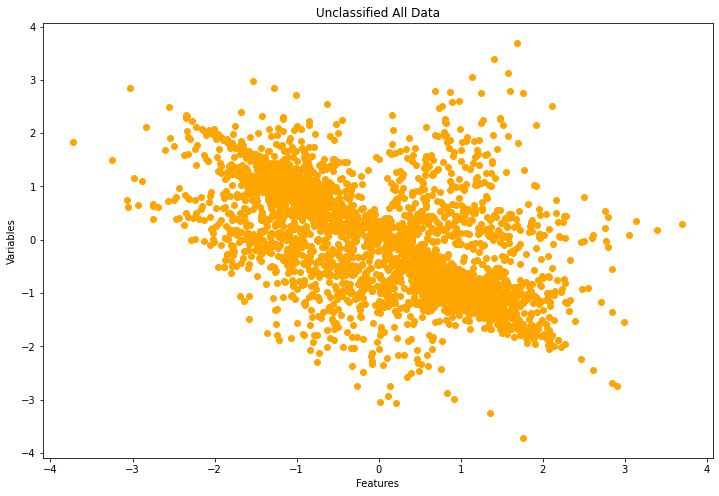

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c='orange')
plt.scatter(X[:,1],X[:,2],c='orange')
plt.scatter(X[:,2],X[:,3],c='orange')
plt.xlabel('Features')
plt.ylabel('Variables')
plt.title('Unclassified All Data')

#### Terminology

* Decision Node : When a sub-node splits into further sub-nodes, it’s a decision node.
* Leaf Node or Terminal Node : Nodes that do not split are called leaf or terminal nodes
* Branch or Sub-Tree : A sub-section of decision tree is called branch or a sub-tree, just as a portion of a graph is called a sub-graph.
* Parent Node and Child Node : These are relative terms. Any node that falls under another node is a child node or sub-node, and any node which precedes those child nodes is called a parent node.

#### Description of the Decision Tree Regressor

* **#1 threshold** : threshold values are generated by unique values in each column of X_train

* **#2 split()** : The left and right datasets are created by comparing the generated threshold values with the data in each column and row of X_train

* **#3 information_gain()** : computation of the information gain.

    The gini index or entropy can be used as information gain. **These methods have explained the below in the figure.**

    It determines which of the n pairs of right and left datasets formed after the split() method will be selected. The split pair with high information gain is selected.

* **#4 best_split()** : Thresholds mentioned in step 1 **(#1)** are created here.

    The left and right datasets created with each unique threshold value and the unsplitted X_train(parent) dataset enter information_gain().
    
    In step 3 **(#3)**, the split with the highest information gain is selected and this is considered as BEST SPLIT.
    
    **BEST SPLIT** is the dict() data structure that holds the index of the selected column of X_train, the current information gain from which it is selected, the threshold value that separates the left and right datasets, and accordingly the left and right datasets.
    
    In this way, the right and left child nodes are selected.

* **#5 build_tree()** : This is recursive function. min_samples_split and max_depth are checked. The best_split() method runs and the BEST SPLIT obtained is used to create the left and right sub_trees (**branches**). The current depth is incremented with each if condition and decision nodes are created.
    
    Decision nodes obtained by returning the Node() class become node objects.
    
    **BUT !!** Data that does not meet the first if condition, i.e. RESULTED, goes to the NON-Decision Node node type : **LEAF NODE**.

* **#6 leaf_value()** : Whichever binary value has the most in the y_train data stack arriving at the leaf node, that value is returned.

    Leaf node is output node, it does not create branches again, it gives direct results.At the stage 5 **(#5)**, the data that DOES NOT comply with the if condition and goes directly to leaf_value() becomes an object of the Node() class. 
    
    Assigned to **value** in Node()'s constructor.

* **#7 fit()** : X_train and y_train are concatenated in an array and form the **data** variable, which is mentioned abundantly in the methods mentioned above. Assign the build_tree() method to the *root* attribute. 

* **#8 make_prediction()** : Remember in step 4 **(#4)** best split() returns a Node() object !!

     It is a recursive function. 
     
     The first if condition checks whether a leaf node has been created or not. 
     
     If it is, it returns **root.value**, that is, the value attribute of the constructor of the Node() object.
     
     **root.feature_idx** allows the index of the selected column of X_train to assign to each row of X_test (example: X_test[0][root.feature.idx] = numeric value) . 
     
     The second if condition compares **root.threshold** with the value in the **root.feature_idx** column in row n of X_test.
     
     If the value obtained is less than threshold and equal to the left child node; if it is greater, the right child goes to the node and continues until the leaf node is reached, that is, the recursive function returns.
 
* **#9 predict()** : Applies the make_prediction() method to the entire X_test.

#### Example Figures of the Decision Trees for the Better Understanding

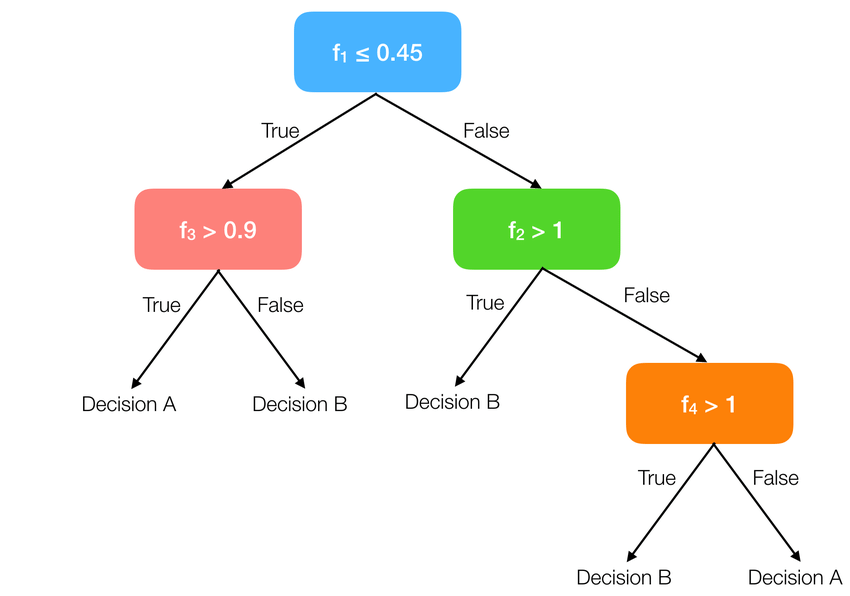

In [7]:
Image.open('Figures/tree_classifier.png')

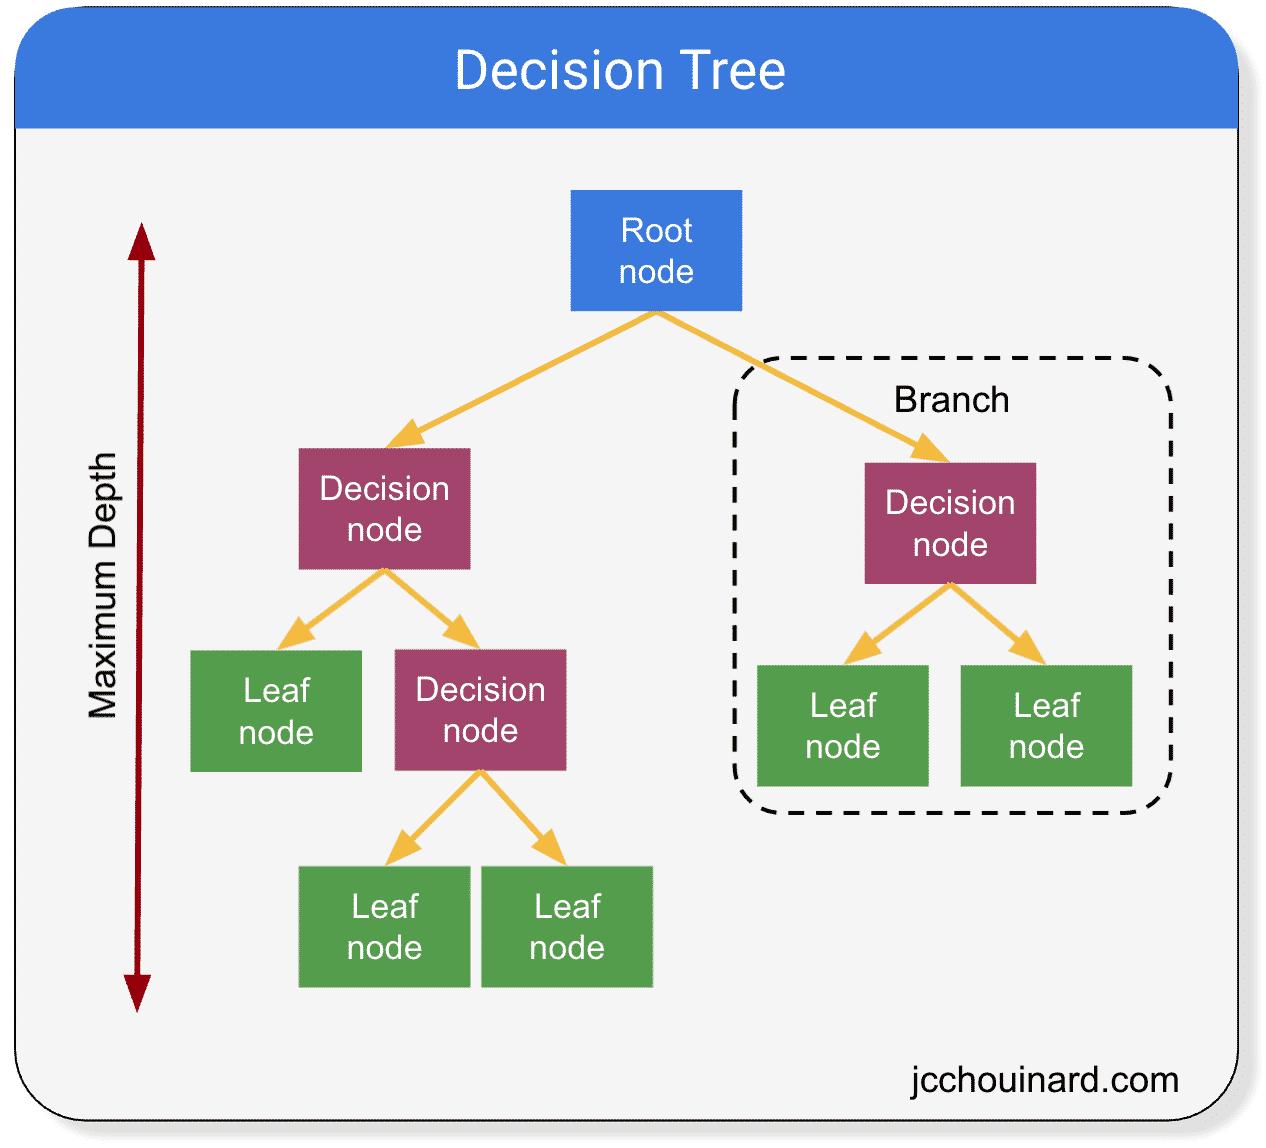

In [8]:
Image.open('Figures/subtree.png')

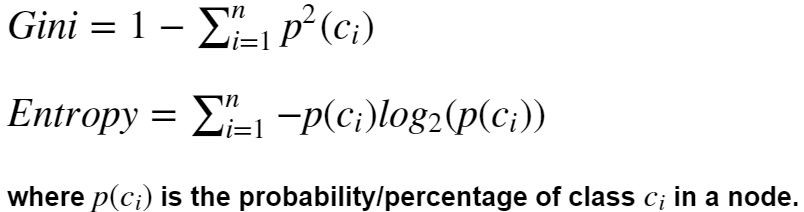

In [9]:
Image.open('Figures/gini_entropy.jpeg')

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [11]:
class Node():
    def __init__(self, feature_idx=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        
        # for decision node
        self.feature_idx = feature_idx
        self.threshold = threshold  #threshold
        self.left = left #left child node 
        self.right = right #right chil node 
        self.info_gain = info_gain #information gain
        
        # for leaf node
        self.value = value

In [12]:
class DecisionTreeClassifier_mine():
    
    """
    A decision tree regressor.
    
    Parameters::
    
        min_samples_split : int or float, default=2
        The minimum number of samples required to split an internal node:
        
        min_samples_leaf : int or float, default=1
        The minimum number of samples required to be at a leaf node. 
        
        splitter : str, default=best
        Supported strategies are “best” to choose the best split 
        
        random_state : bool, default=None
        
    """
        
        
    
    def __init__(self, min_samples_split=2, max_depth=2,random_state=None,criterion='gini'):
        
        self.root = None
        self.random_state=random_state
        self.criterion=criterion
        
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth 
       
             
    def split(self, data, feature_idx, threshold):
        
        data_left = np.array([row for row in data if row[feature_idx]<=threshold])
        data_right = np.array([row for row in data if row[feature_idx]>threshold])
        
        return data_left, data_right
    
    
    def information_gain(self,parent,left_child,right_child):
        
        weight_left = left_child.shape[0] / parent.shape[0]
        weight_right = right_child.shape[0] / parent.shape[0]
        
        if self.criterion=='gini':
            
            return self.gini_impurity(parent)-( (weight_left*self.gini_impurity(left_child))  +  (weight_right*self.gini_impurity(right_child) ) )
        
        elif self.criterion=='entropy':
            
            return self.entropy(parent)-( (weight_left*self.entropy(left_child))  +  (weight_right*self.entropy(right_child) ) )
        
  

    def gini_impurity(self,y):
        
        labels=np.unique(y)
        gini=np.array([ (len(np.where(y==label)[0])/y.shape[0])**2 for label in labels]) #probability**2 calculation according to formula
        
        return 1-gini.sum()
    

    def entropy(self,y):
        
        labels=np.unique(y)
        entropy=0
        
        for label in labels:
            
            p=len(np.where(y==label)[0])/y.shape[0] #probability calculation according to formula 
            entropy+= -p*np.log2(p)
        
        return entropy
    
        
    def best_split(self, data, n_features):
        
        best_split_dict = {}
        max_info_gain = -float("inf")
        
        for feature_idx in range(n_features):
            
            feature_values = data[:, feature_idx]
            possible_thresholds = np.unique(feature_values)
            np.random.seed(self.random_state)
            
            for threshold in possible_thresholds:
                
                data_left, data_right = self.split(data, feature_idx, threshold)
                
                if len(data_left)>0 and len(data_right)>0:
                    
                    parent,left_child,right_child=data[:,-1],data_left[:,-1],data_right[:,-1]
                    curr_info_gain = self.information_gain(parent, left_child, right_child)
                    
                    if curr_info_gain>max_info_gain:
                        
                        best_split_dict["feature_idx"] = feature_idx
                        best_split_dict["threshold"] = threshold
                        best_split_dict["data_left"] = data_left
                        best_split_dict["data_right"] = data_right
                        best_split_dict["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        return best_split_dict


    def leaf_value(self, y):
        
        y=list(y)
        return max(y,key=y.count)
            
        
            
    def build_tree(self, data, curr_depth=0):
        
        X=data[:,:-1]
        y=data[:,-1]
        n_samples, n_features = np.shape(X)
        best_split_dict = {}
        
        if (n_samples>=self.min_samples_split) and (curr_depth<=self.max_depth):
            
            best_split_dict = self.best_split(data, n_features)
            
            if best_split_dict["info_gain"]>0:
               
                left_subtree = self.build_tree(best_split_dict["data_left"], curr_depth+1)
                
                right_subtree = self.build_tree(best_split_dict["data_right"], curr_depth+1)

                return Node(best_split_dict["feature_idx"], best_split_dict["threshold"], 
                            left_subtree, right_subtree, best_split_dict["info_gain"])
        
        
        leaf_node=self.leaf_value(y)
        
        return Node(value=leaf_node)
        
      
        
    def fit(self, X, y):
        
        data = np.c_[X,y]
        self.root = self.build_tree(data)
        

    def make_prediction(self, row, root):
        
        if root.value!=None: 
            
            return root.value
        
        feature_variable = row[root.feature_idx]
        
        if feature_variable <=root.threshold:
            
            return self.make_prediction(row, root.left)
        
        else:
            
            return self.make_prediction(row, root.right)
    
    
    def predict(self, X):
        
        preditions = np.array([self.make_prediction(x, self.root) for x in X])
        return preditions


#### Hand-made ,Criterion = Entropy Loss

In [13]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,jaccard_score,confusion_matrix
import seaborn as sns

In [14]:
model_mine=DecisionTreeClassifier_mine(max_depth=2,min_samples_split=2,random_state=42,criterion='entropy')

In [15]:
model_mine.fit(X_train,y_train)

In [16]:
yhat_mine=model_mine.predict(X_test)

In [17]:
f1_score(y_test,yhat_mine)

0.937888198757764

In [18]:
jaccard_score(y_test,yhat_mine)

0.8830409356725146

In [19]:
accuracy_score(y_test,yhat_mine)

0.9393939393939394

In [20]:
roc_auc_score(y_test,yhat_mine)

0.9400574035914041

#### Plots Hand-made

In [21]:
cm_mine=confusion_matrix(y_test,yhat_mine)

[Text(0.5, 51.0, 'Actual Values'), Text(87.0, 0.5, 'Predicted Values')]

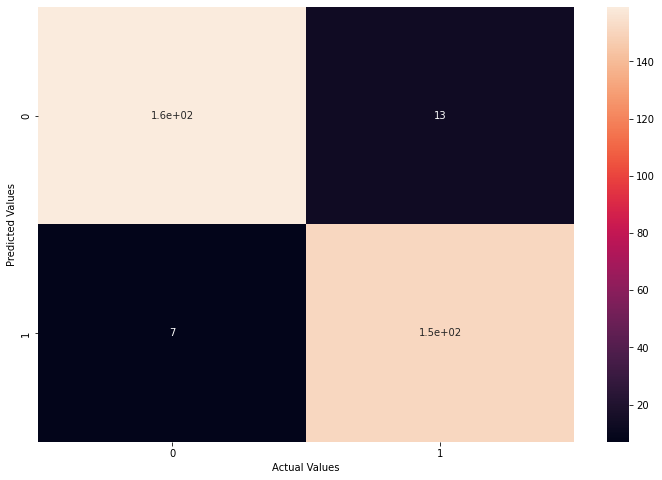

In [22]:
fig=plt.figure(figsize=(12,8))
fig=sns.heatmap(confusion_matrix(y_test,yhat_mine),annot=True)
fig.set(xlabel='Actual Values', ylabel='Predicted Values')

Text(0.5, 1.0, 'Classified Predict Data (Hand-made)')

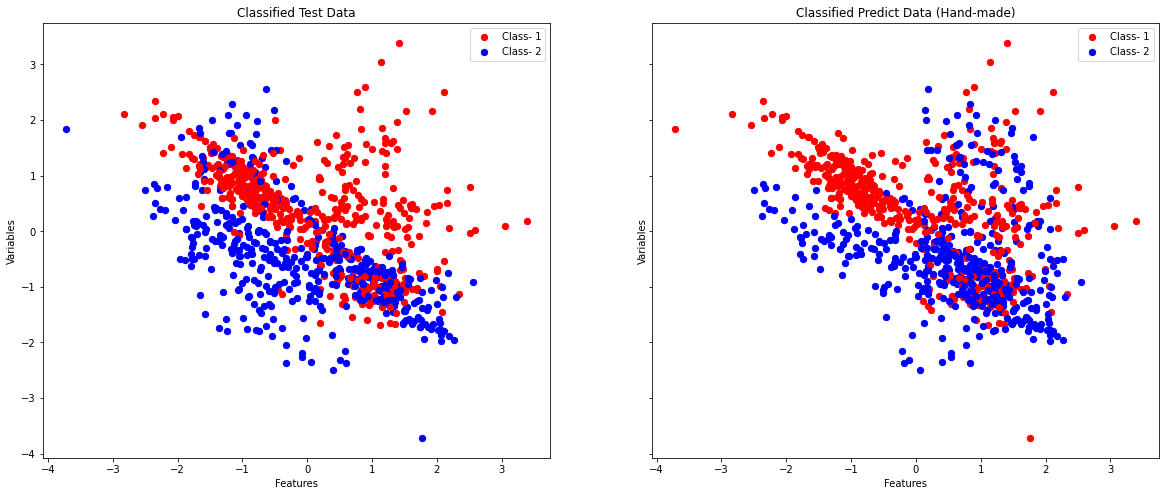

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,8))
ax1.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], s = 40, c ='r', label = 'Class- 1')
ax1.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], s = 40, c ='b', label = 'Class- 2')

ax1.scatter(X_test[y_test == 0, 1], X_test[y_test == 0, 2], s = 40, c ='r')
ax1.scatter(X_test[y_test == 1, 1], X_test[y_test == 1, 2], s = 40, c = 'b')

ax1.scatter(X_test[y_test == 0, 2], X_test[y_test == 0, 3], s = 40, c ='r')
ax1.scatter(X_test[y_test == 1, 2], X_test[y_test == 1, 3], s = 40, c = 'b')

ax1.legend()
ax1.set_xlabel('Features')
ax1.set_ylabel('Variables')
ax1.set_title('Classified Test Data')

ax2.scatter(X_test[yhat_mine == 0, 0], X_test[yhat_mine == 0, 1], s = 40, c ='r', label = 'Class- 1')
ax2.scatter(X_test[yhat_mine == 1, 0], X_test[yhat_mine == 1, 1], s = 40, c ='b', label = 'Class- 2')

ax2.scatter(X_test[yhat_mine == 0, 1], X_test[yhat_mine == 0, 2], s = 40, c ='r')
ax2.scatter(X_test[yhat_mine == 1, 0], X_test[yhat_mine == 1, 2], s = 40, c = 'b')

ax2.scatter(X_test[yhat_mine == 0, 2], X_test[yhat_mine == 0, 3], s = 40, c ='r')
ax2.scatter(X_test[yhat_mine == 1, 2], X_test[yhat_mine == 1, 3], s = 40, c = 'b')

ax2.legend()
ax2.set_xlabel('Features')
ax2.set_ylabel('Variables')
ax2.set_title('Classified Predict Data (Hand-made)')

#### Sklearn Results , Criterion = Entropy Loss

In [24]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [25]:
model_sklearn=DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=2,min_samples_split=2)

In [26]:
model_sklearn.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [27]:
yhat_sklearn=model_sklearn.predict(X_test)

In [28]:
f1_score(y_test,yhat_sklearn)

0.9296636085626911

In [29]:
jaccard_score(y_test,yhat_sklearn)

0.8685714285714285

In [30]:
accuracy_score(y_test,yhat_sklearn)

0.9303030303030303

In [31]:
roc_auc_score(y_test,yhat_sklearn)

0.9315940535766853

#### Plots Sklearn

[Text(0.5, 51.0, 'Actual Values'), Text(87.0, 0.5, 'Predicted Values')]

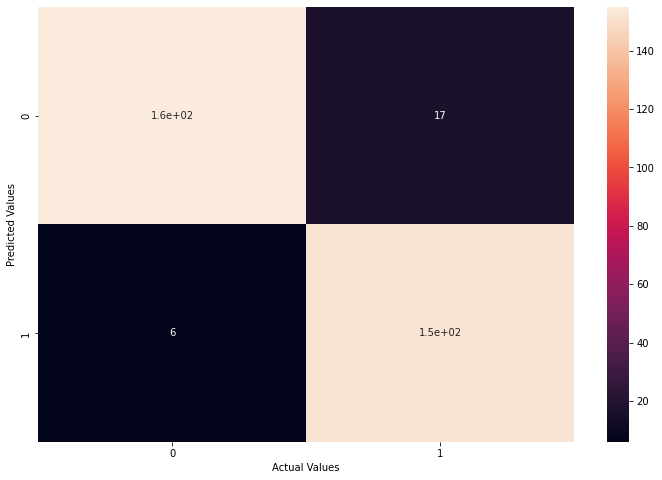

In [32]:
fig=plt.figure(figsize=(12,8))
fig=sns.heatmap(confusion_matrix(y_test,yhat_sklearn),annot=True)
fig.set(xlabel='Actual Values', ylabel='Predicted Values')

Text(0.5, 1.0, 'Classified Predict Data (Sklearn)')

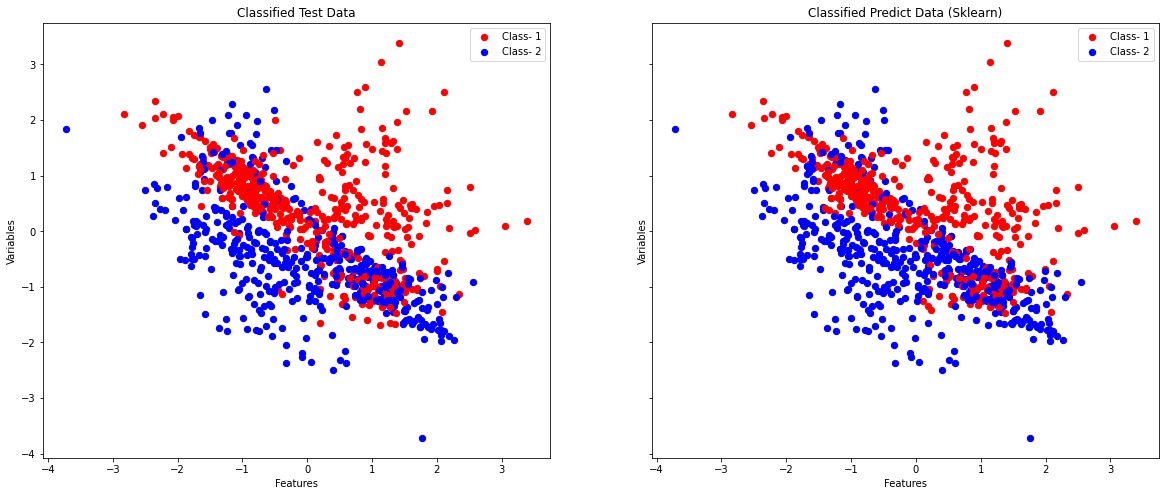

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,8))
ax1.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], s = 40, c ='r', label = 'Class- 1')
ax1.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], s = 40, c ='b', label = 'Class- 2')

ax1.scatter(X_test[y_test == 0, 1], X_test[y_test == 0, 2], s = 40, c ='r')
ax1.scatter(X_test[y_test == 1, 1], X_test[y_test == 1, 2], s = 40, c = 'b')

ax1.scatter(X_test[y_test == 0, 2], X_test[y_test == 0, 3], s = 40, c ='r')
ax1.scatter(X_test[y_test == 1, 2], X_test[y_test == 1, 3], s = 40, c = 'b')

ax1.legend()
ax1.set_xlabel('Features')
ax1.set_ylabel('Variables')
ax1.set_title('Classified Test Data')

ax2.scatter(X_test[yhat_sklearn== 0, 0], X_test[yhat_sklearn == 0, 1], s = 40, c ='r', label = 'Class- 1')
ax2.scatter(X_test[yhat_sklearn == 1, 0], X_test[yhat_sklearn == 1, 1], s = 40, c ='b', label = 'Class- 2')

ax2.scatter(X_test[yhat_sklearn == 0, 1], X_test[yhat_sklearn == 0, 2], s = 40, c ='r')
ax2.scatter(X_test[yhat_sklearn == 1, 1], X_test[yhat_sklearn == 1, 2], s = 40, c = 'b')

ax2.scatter(X_test[yhat_sklearn == 0, 2], X_test[yhat_sklearn == 0, 3], s = 40, c ='r')
ax2.scatter(X_test[yhat_sklearn == 1, 2], X_test[yhat_sklearn == 1, 3], s = 40, c = 'b')

ax2.legend()
ax2.set_xlabel('Features')
ax2.set_ylabel('Variables')
ax2.set_title('Classified Predict Data (Sklearn)')

[Text(0.5, 0.8333333333333334, 'X[0] <= 0.123\nentropy = 1.0\nsamples = 670\nvalue = [328, 342]'),
 Text(0.25, 0.5, 'X[2] <= -1.527\nentropy = 0.381\nsamples = 337\nvalue = [312, 25]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.523\nsamples = 17\nvalue = [2, 15]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.201\nsamples = 320\nvalue = [310, 10]'),
 Text(0.75, 0.5, 'X[1] <= -0.435\nentropy = 0.278\nsamples = 333\nvalue = [16, 317]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.109\nsamples = 278\nvalue = [4, 274]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.757\nsamples = 55\nvalue = [12, 43]')]

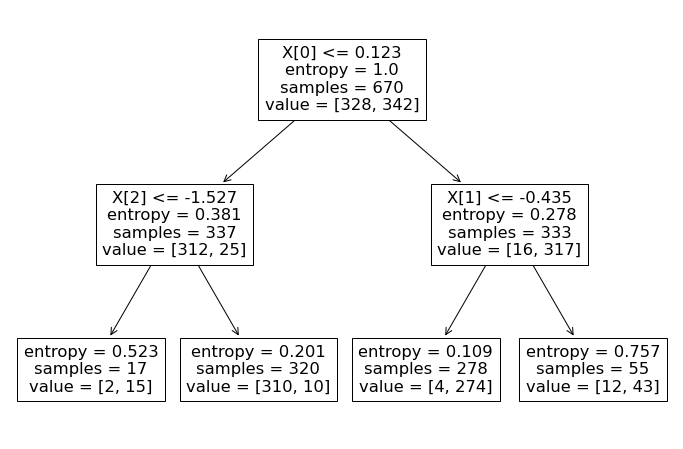

In [34]:
plt.figure(figsize=(12,8))
plot_tree(model_sklearn)